# ❓ <font color='green'> <u> PROBLEM STATEMENT (Decision_Tree_Fraud_Check) </u>

## 🔵 Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

### ➡ Data Description:
+ #### Undergrad : person is under graduated or not
+ #### Marital.Status : marital status of a person
+ #### Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
+ #### Work Experience : Work experience of an individual person
+ #### Urban : Whether that person belongs to urban area or not

___

## ⚫ <u>Introduction:
+ ###  <font color='candy'><u> Random forest </u></font> is a machine learning algorithm that combines the results of multiple decision trees to produce a single result. It is a supervised learning algorithm that is used for classification, regression, and other tasks. The algorithm uses bagging and feature randomness to create a forest of trees that are uncorrelated. The prediction by committee of these trees is more accurate than any individual tree.

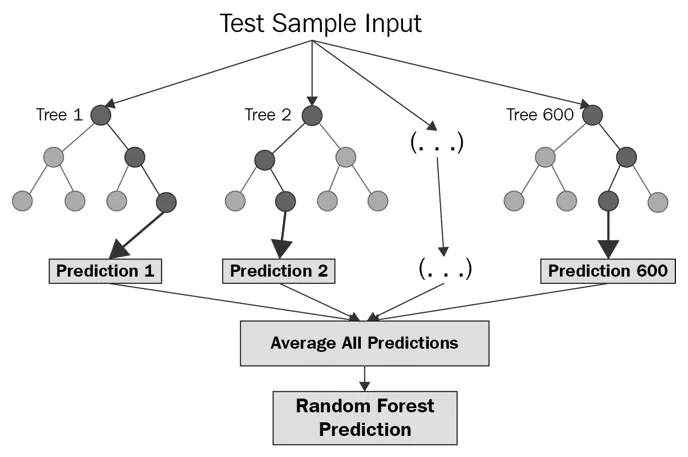

___

* ### <font color = 'blue'> <u> IMPORT NECESSARY LIBRARIES </u>

In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style= 'darkgrid', palette= 'pastel')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree

___

* ### <font color = 'blue'> <u> READ DATA </u>

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/SwatiVPatil/Data_sets_Assignments/main/Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
df.rename(columns = {'Marital.Status':'Marital_Status', 'Taxable.Income':'Taxable_Income',
                     'City.Population':'City_Population', 'Work.Experience':'Work_Experience'},
          inplace=True)
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


* ##### <font color ='green'> <u>Creating Target Column:</u>

Tax_Status = Those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [3]:
df['Tax_Status'] = "Good"
df.loc[df['Taxable_Income'] <= 30000,'Tax_Status'] = 'Risky'
df.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax_Status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


___

* ### <font color = 'blue'> <u> PERFORM EDA </u>

* ##### <font color ='green'> <u>Data Summary</u>

In [4]:
df.shape

(600, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
 6   Tax_Status       600 non-null    object
dtypes: int64(3), object(4)
memory usage: 32.9+ KB


* ##### <font color ='green'> <u>Descriptive statistics</u>

In [6]:
df.describe()

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
df.isna().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
Tax_Status         0
dtype: int64

In [8]:
df.duplicated().sum()

0

> * #### There are 600 records and 6 Variables.
> * #### All variables are in proper data type.
> * #### "Tax_Status" is target column.
> * #### No null value observed.
> * #### There is no duplicated record.

___

* ### <font color = 'blue'> <u> DATA VISUALISATION </u>

<Axes: >

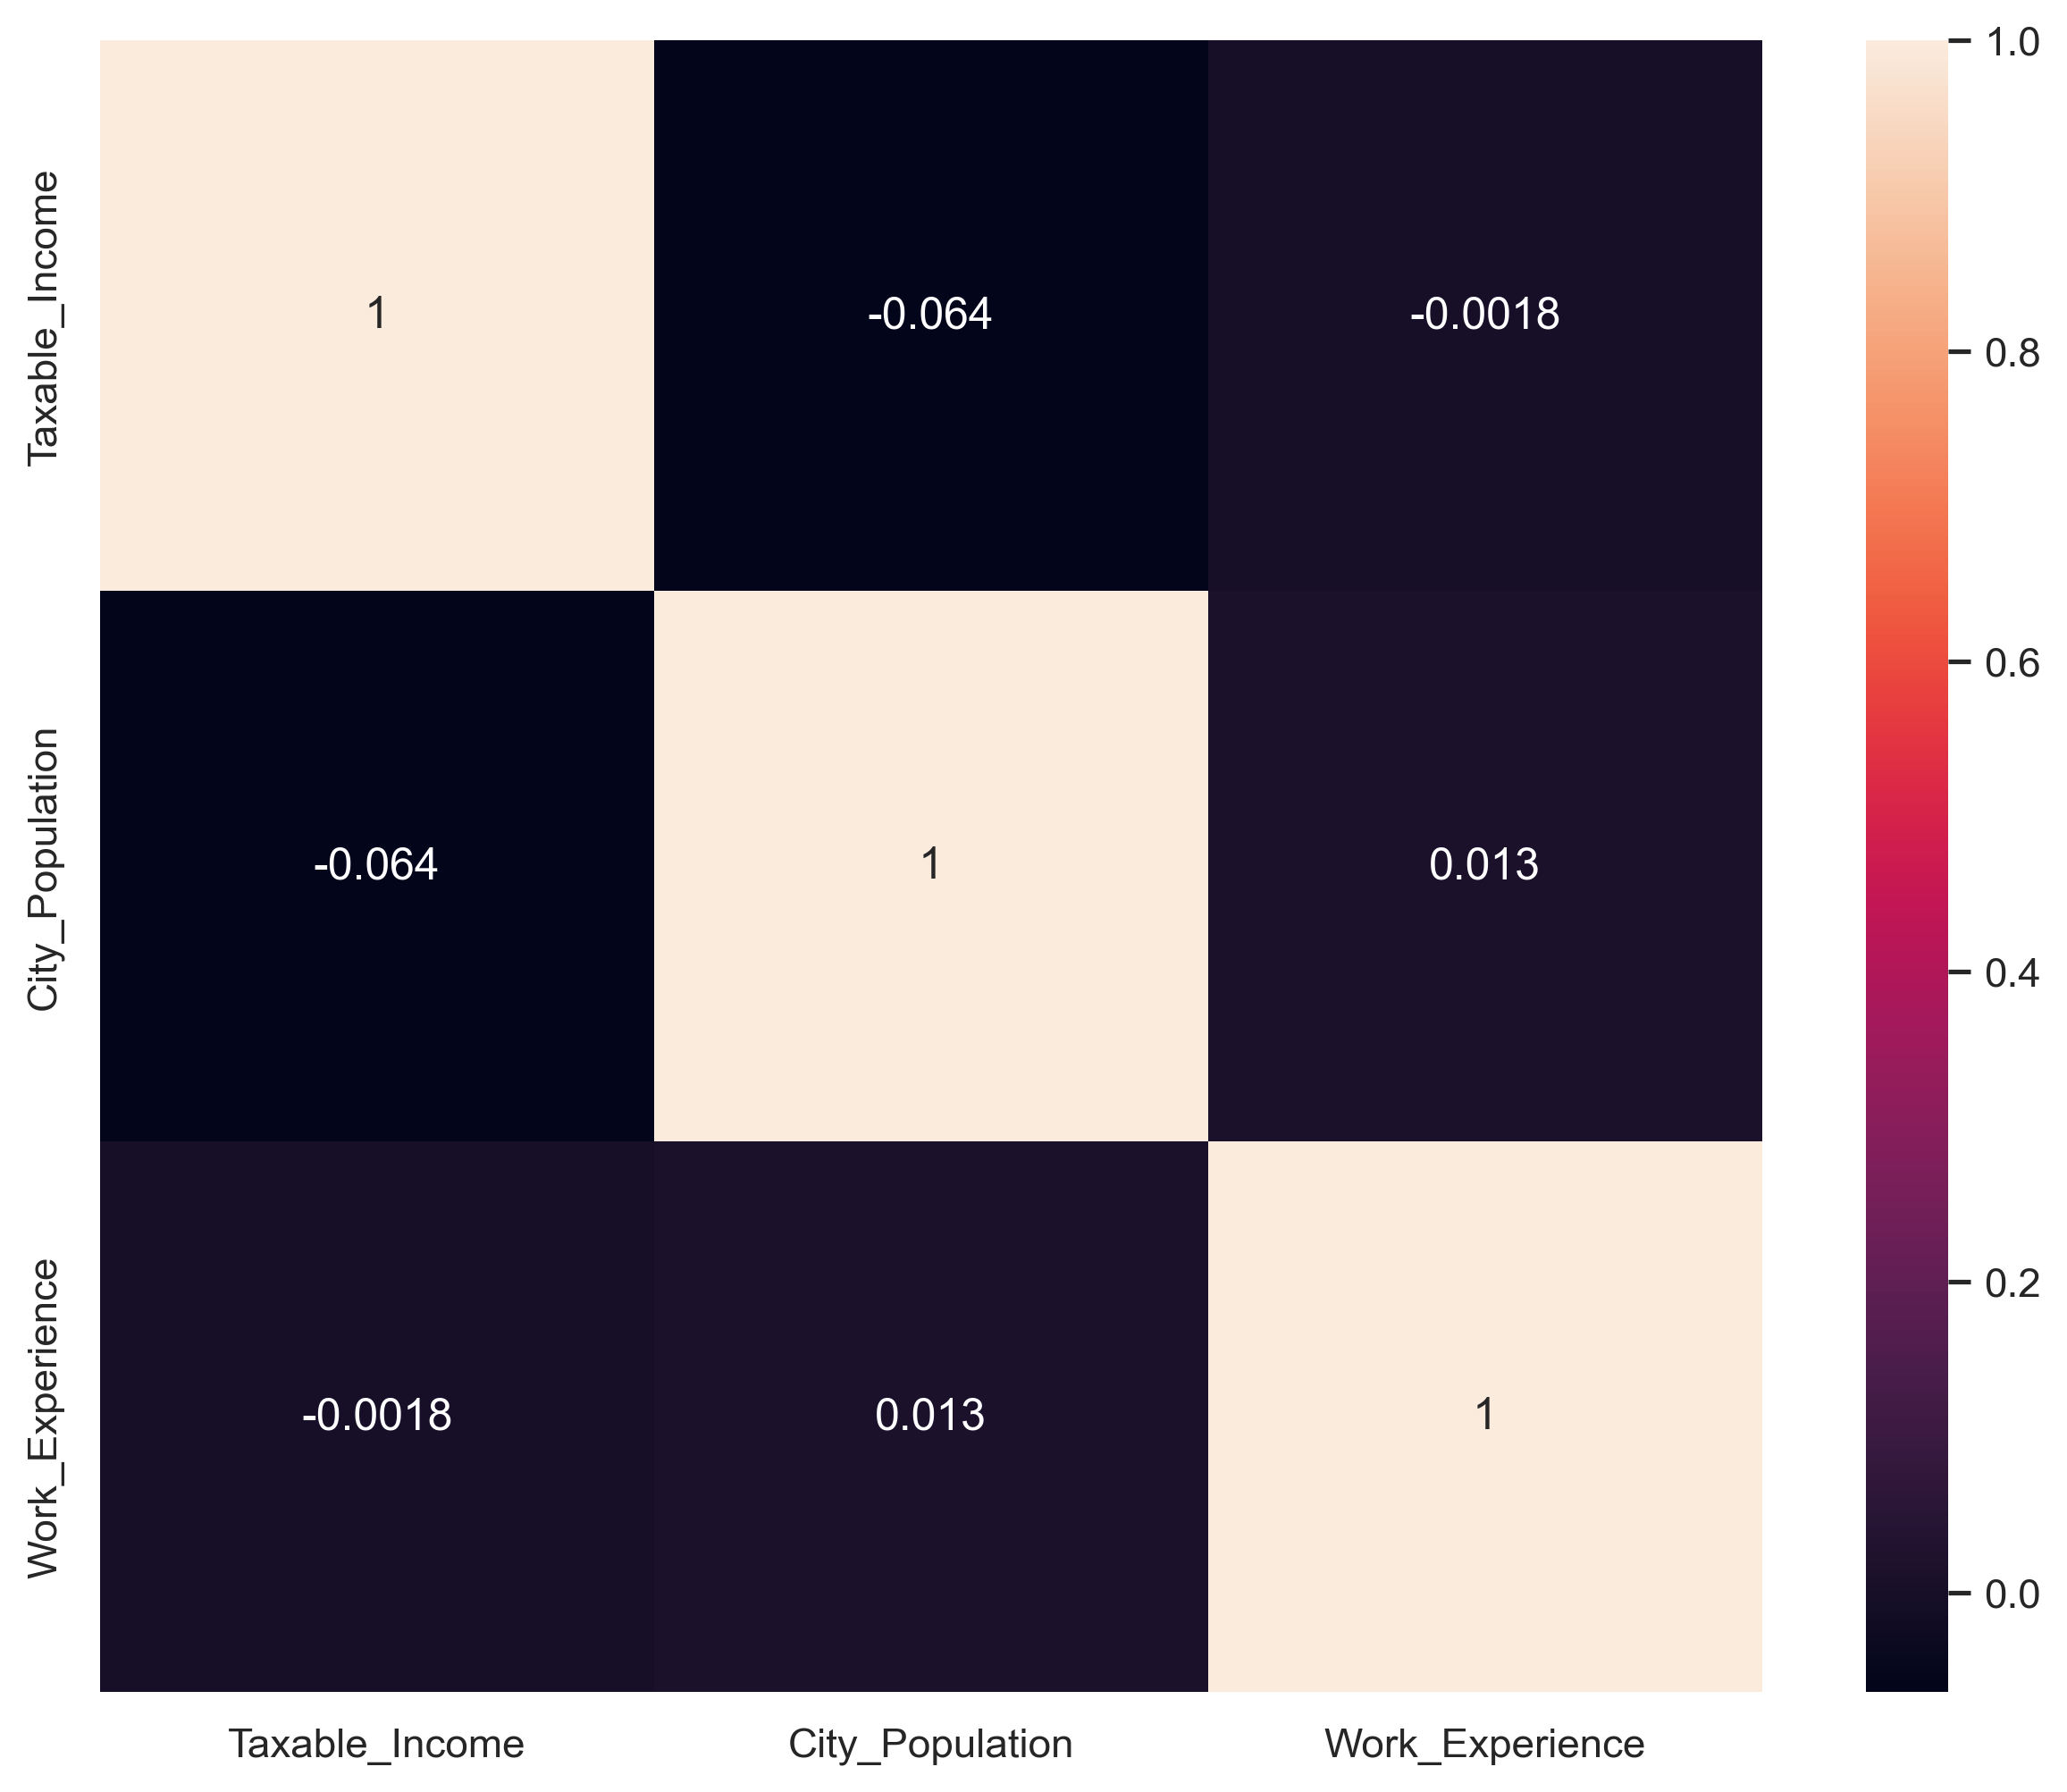

In [9]:
# Correation between Numerical variables:
sns.heatmap(df.corr(), annot = True)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

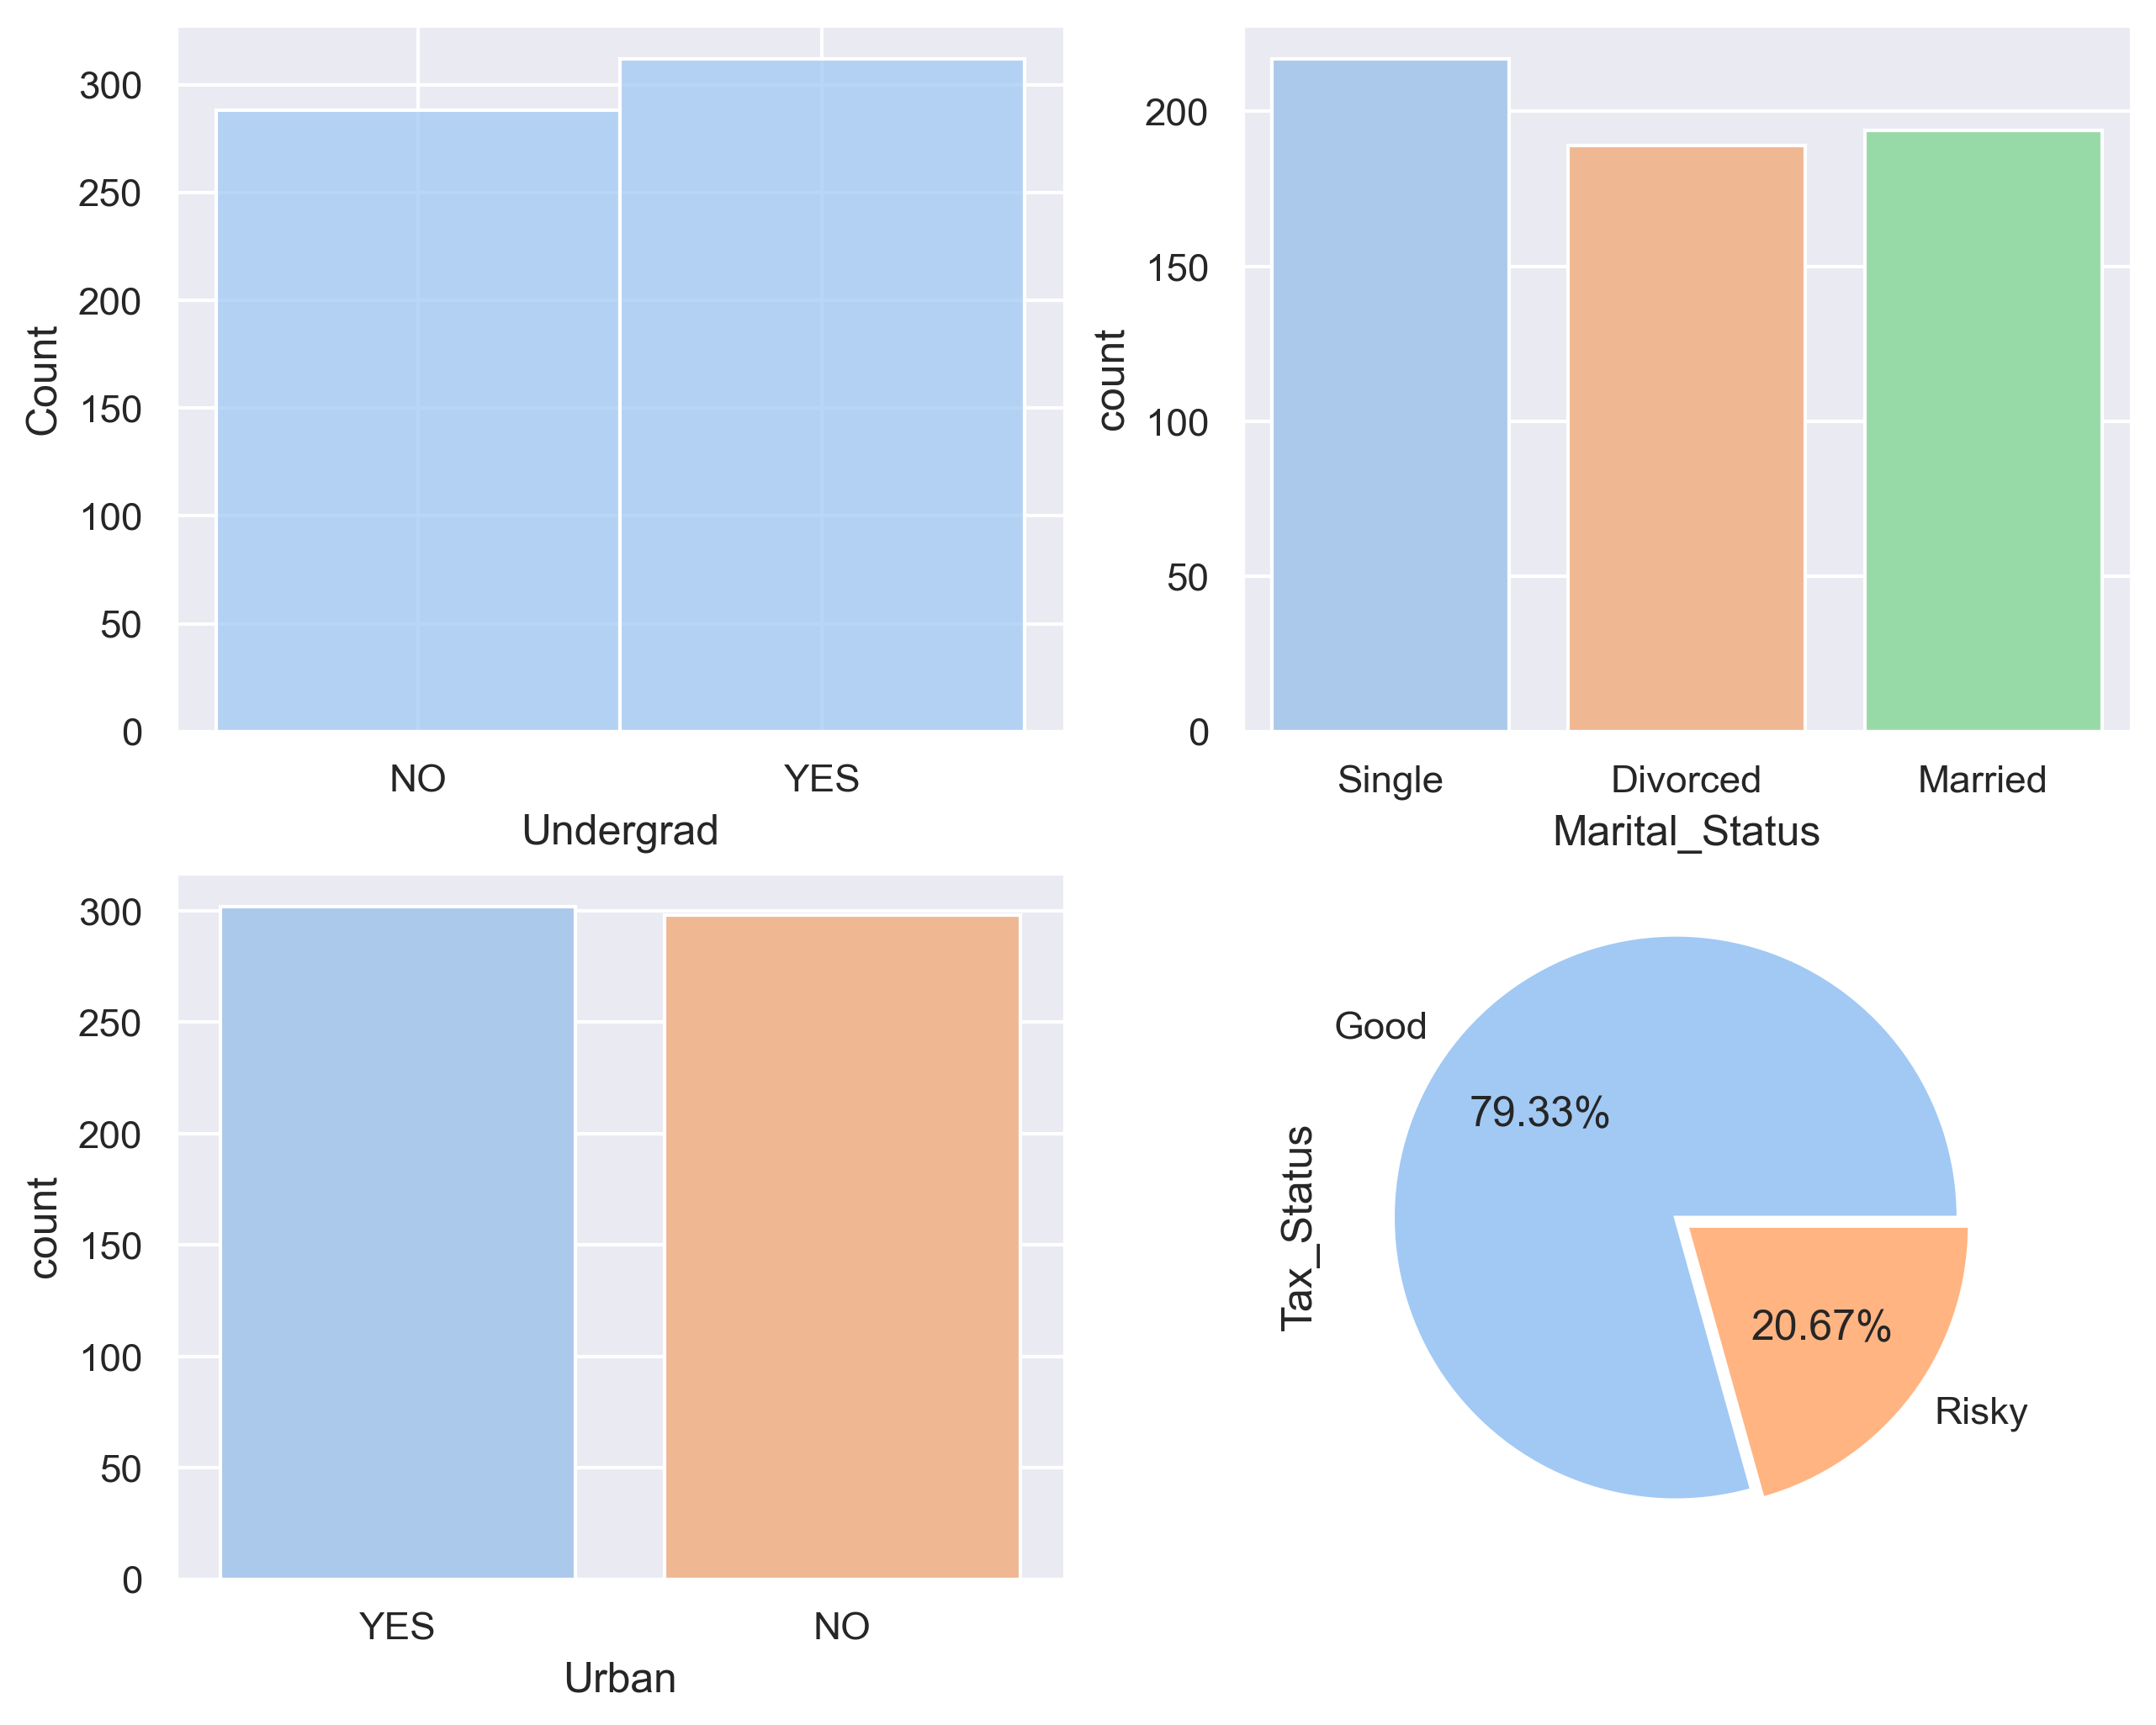

In [10]:
# Plottig Categorical Variables:
fig,index = plt.subplots(2,2)

sns.histplot(df['Undergrad'],ax = index[0,0])
sns.countplot(x = df['Marital_Status'], ax = index[0,1])
sns.countplot(x = df['Urban'], ax = index[1,0])
df['Tax_Status'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%', ax = index[1,1], explode= [0.05,0.0])
plt.tight_layout

Taxable_Income        Axes(0.125,0.11;0.227941x0.77)
City_Population    Axes(0.398529,0.11;0.227941x0.77)
Work_Experience    Axes(0.672059,0.11;0.227941x0.77)
dtype: object

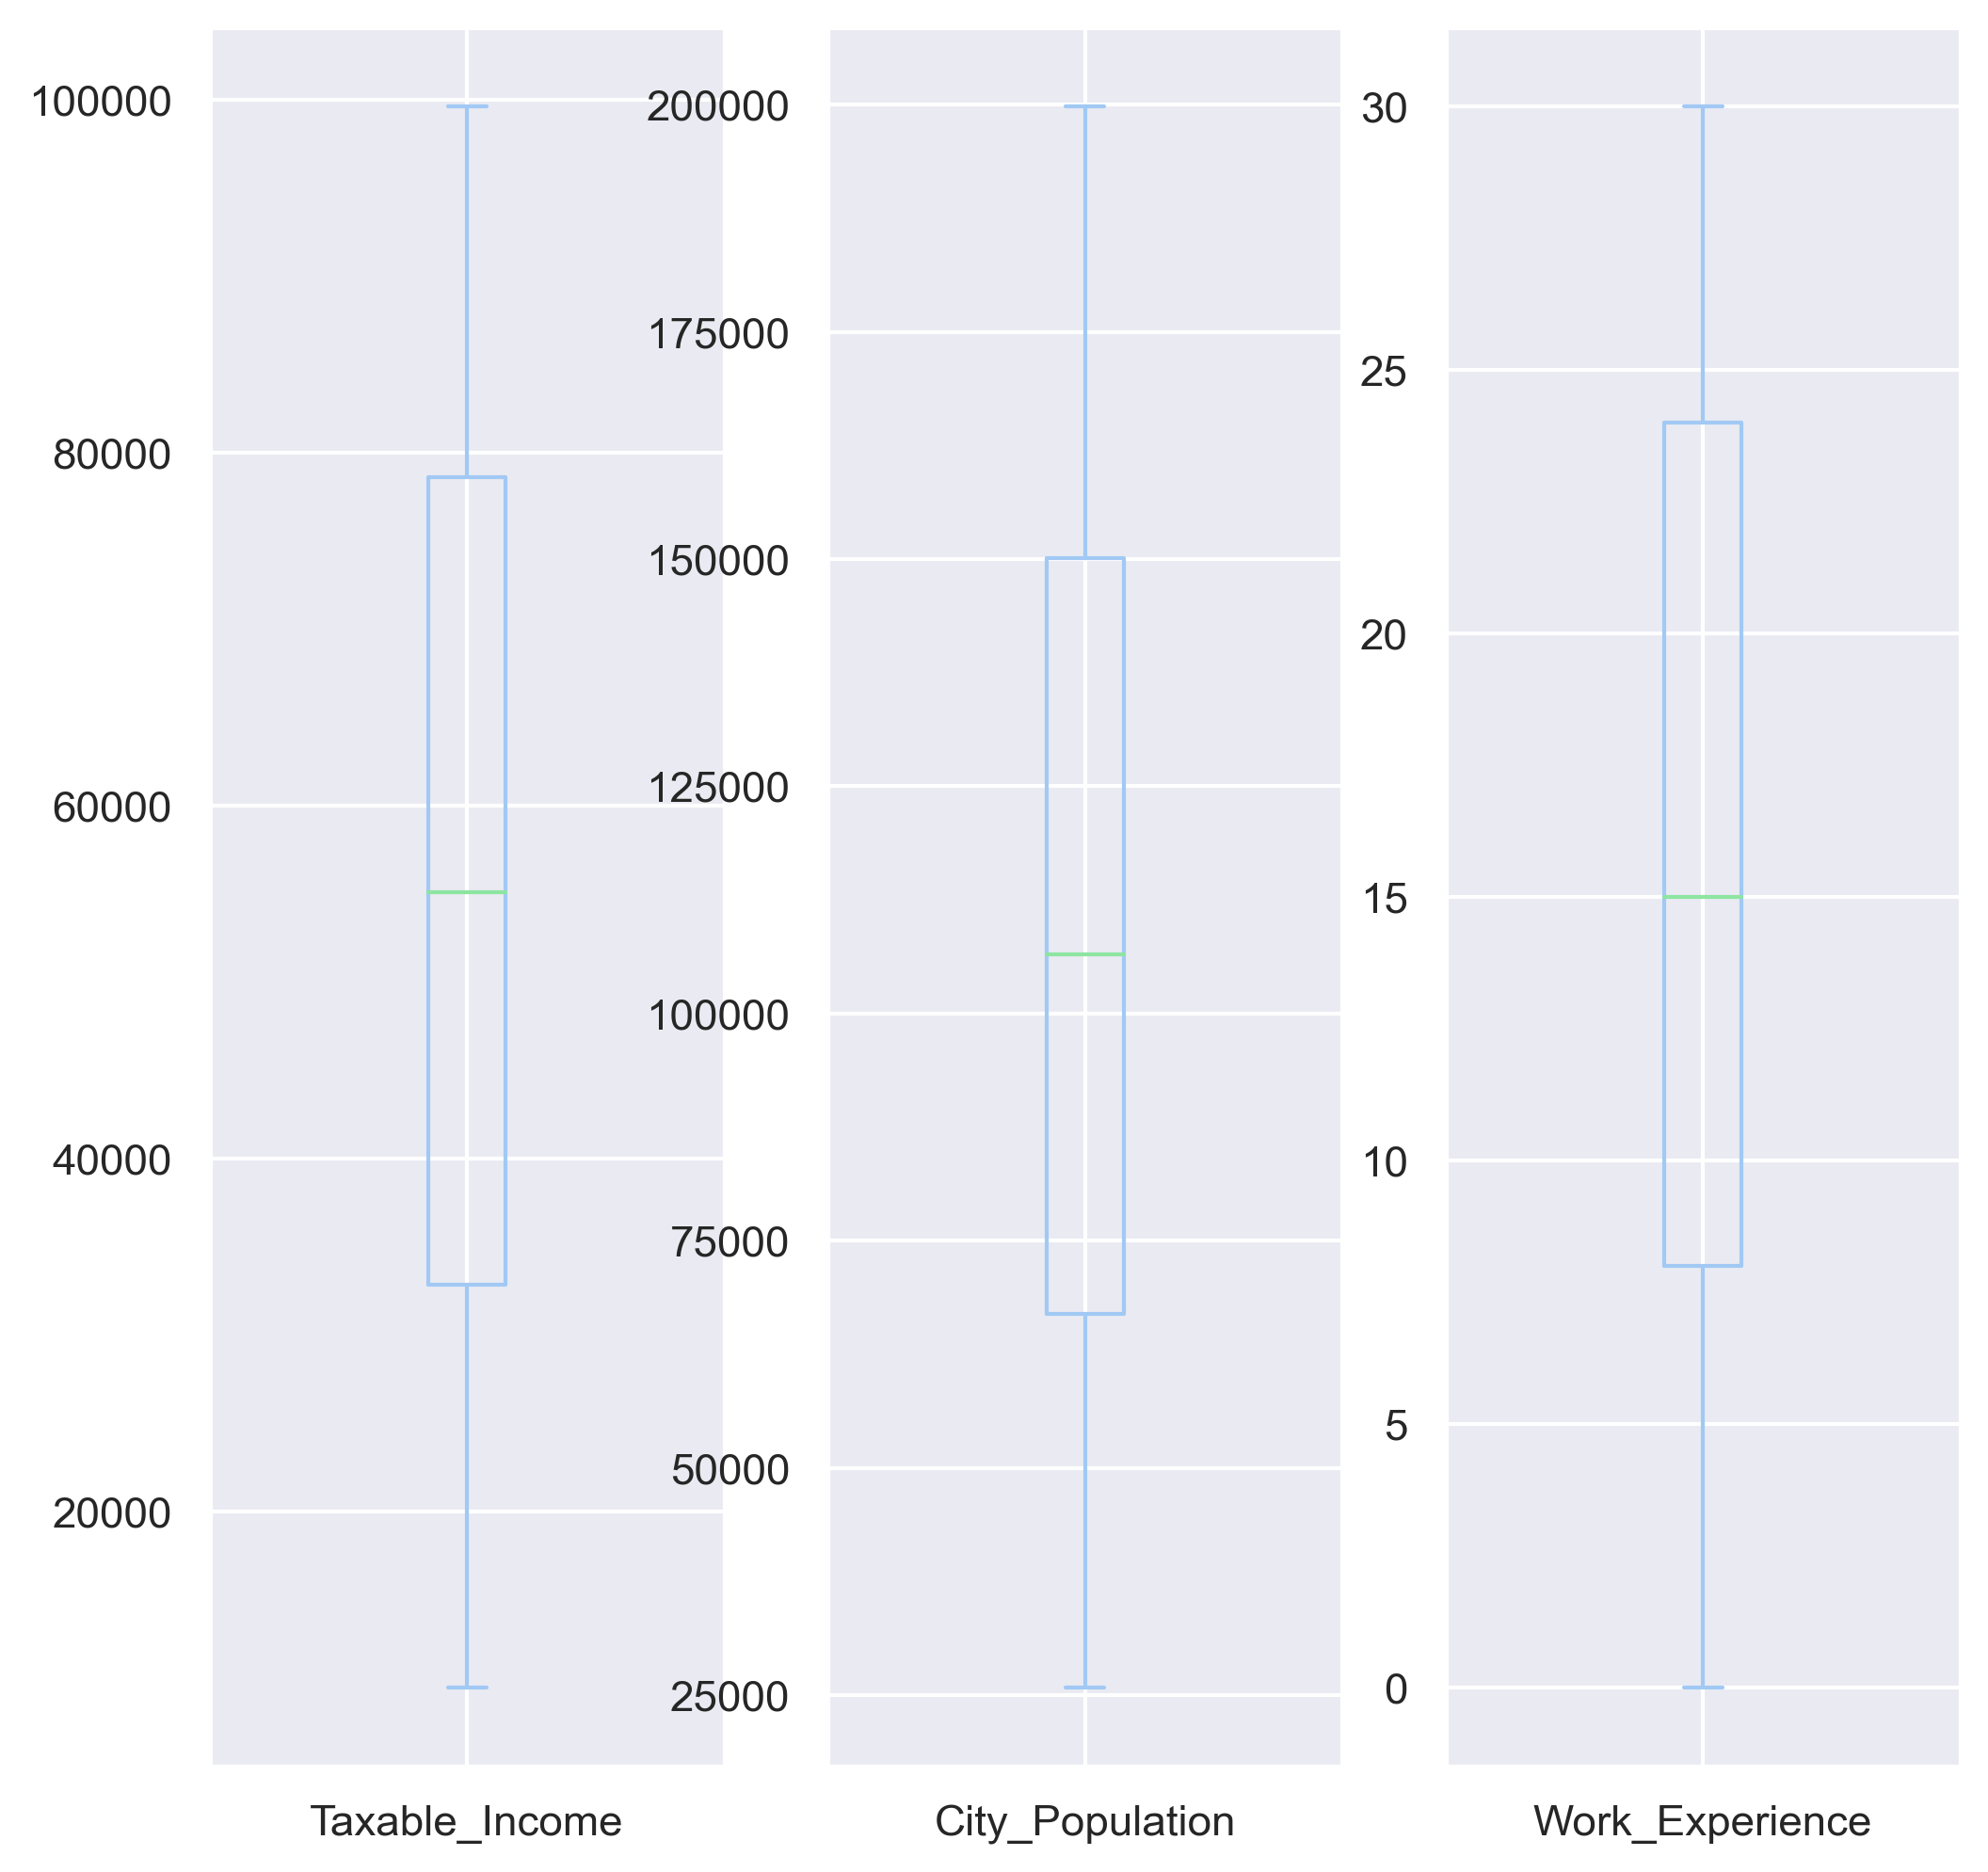

In [11]:
# Boxplot for Numerical Variable:
df[['Taxable_Income', 'City_Population', 'Work_Experience']].plot(kind = 'box', figsize = (8,8), subplots = True)

> * #### We can't see any strong correlation within the numerical variables and no outliers observed in boxplot.
> * #### Percentage of Under-graduated and graduated are almost equal. Same as with Urban population.
> * #### For 'Marital_Status', majority are belongs to Single category followed by Married then Divorced.
> * #### For target variable, 'Tax_Status', 79.33% belong to "Good" category i.e. 'Taxable_Income' greater than 30000, which indicates biased data.

___

* ### <font color = 'blue'> <u> DATA PREPROCESSING  </u>

### <font color = "green">➡ Ordinal Encoding 
* Majority of variables are of object data type so we encode them into numerical data type using Ordinal Encoding.

In [12]:
# Dropping the column Taxable_Income from which we created Target column:
df.drop('Taxable_Income', axis= 1, inplace= True)

In [13]:
# Getting Independent Categorical Variables:
cat_cols = df[['Undergrad', 'Marital_Status', 'Urban']].columns
cat_cols

Index(['Undergrad', 'Marital_Status', 'Urban'], dtype='object')

In [14]:
oe = OrdinalEncoder()
df[cat_cols] = oe.fit_transform(df[cat_cols])
df.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,Tax_Status
0,0.0,2.0,50047,10,1.0,Good
1,1.0,0.0,134075,18,1.0,Good
2,0.0,1.0,160205,30,1.0,Good
3,1.0,2.0,193264,15,1.0,Good
4,0.0,1.0,27533,28,0.0,Good


In [15]:
df['Tax_Status'].value_counts()

Good     476
Risky    124
Name: Tax_Status, dtype: int64

### <font color = "green">➡ Train Test Split 

In [16]:
x = df.iloc[:,:5]
y = df['Tax_Status']

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [18]:
print("Shape of x_train: ",xtrain.shape)
print("Shape of x_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of x_train:  (420, 5)
Shape of x_test:  (180, 5)
Shape of y_train:  (420,)
Shape of y_test (180,)


___

* ### <font color = 'blue'> <u> MODEL BUILDING & EVALUATION</u>

In [19]:
rf = RandomForestClassifier() # Default value for n_estimators is 100.
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)

In [20]:
# Classification Report:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.78      0.94      0.86       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.75       180
   macro avg       0.39      0.47      0.43       180
weighted avg       0.62      0.75      0.68       180



In [21]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 75.00%


In [22]:
print(f'Tranning Score: {rf.score(xtrain,ytrain)}')
print(f'Testing Score:{rf.score(xtest,ytest)}')

Tranning Score: 1.0
Testing Score:0.75


In [23]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[135   8]
 [ 37   0]]


> * #### There is hugh difference in Training And Testing Accuracy with n_estimators = 100. Also the training accuracy is 100% means there is problem of overfitting. So, we perform Hyperparameter Tunning.

___

* ### <font color = 'blue'> <u> HYPERPARAMETER TUNNING</u>

In [24]:
# Defining Dictionary of Parameters:
params = {'n_estimators' : [60,120,150],
          'criterion' : ["gini", "entropy", "log_loss"], 
          'max_depth' : [2,6,10],
          'min_samples_split' : [4,5],
          'min_samples_leaf' : [2,4]
         }

In [25]:
grid = GridSearchCV(RandomForestClassifier(), param_grid = params, verbose= -1,cv= 5)

In [26]:
# Getting Best Parameters:
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 6, 10], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [4, 5],
                         'n_estimators': [60, 120, 150]},
             verbose=-1)

In [27]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 60}

In [28]:
# New Model with parameters we achieved:
rfc = RandomForestClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 2, 
                            min_samples_split = 4, n_estimators = 60)
rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

        Good       0.79      1.00      0.89       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



In [29]:
print(f"Accuracy Score: {accuracy_score(ytest, ypred) * 100:.2f}%")

Accuracy Score: 79.44%


In [30]:
print(f'Tranning Score: {rfc.score(xtrain,ytrain)}')
print(f'Testing Score:{rfc.score(xtest,ytest)}')

Tranning Score: 0.7928571428571428
Testing Score:0.7944444444444444


In [31]:
print(f'Confusion Matrix: \n {confusion_matrix(ytest,ypred)}')

Confusion Matrix: 
 [[143   0]
 [ 37   0]]


Text(277.75, 0.5, 'Actual Values')

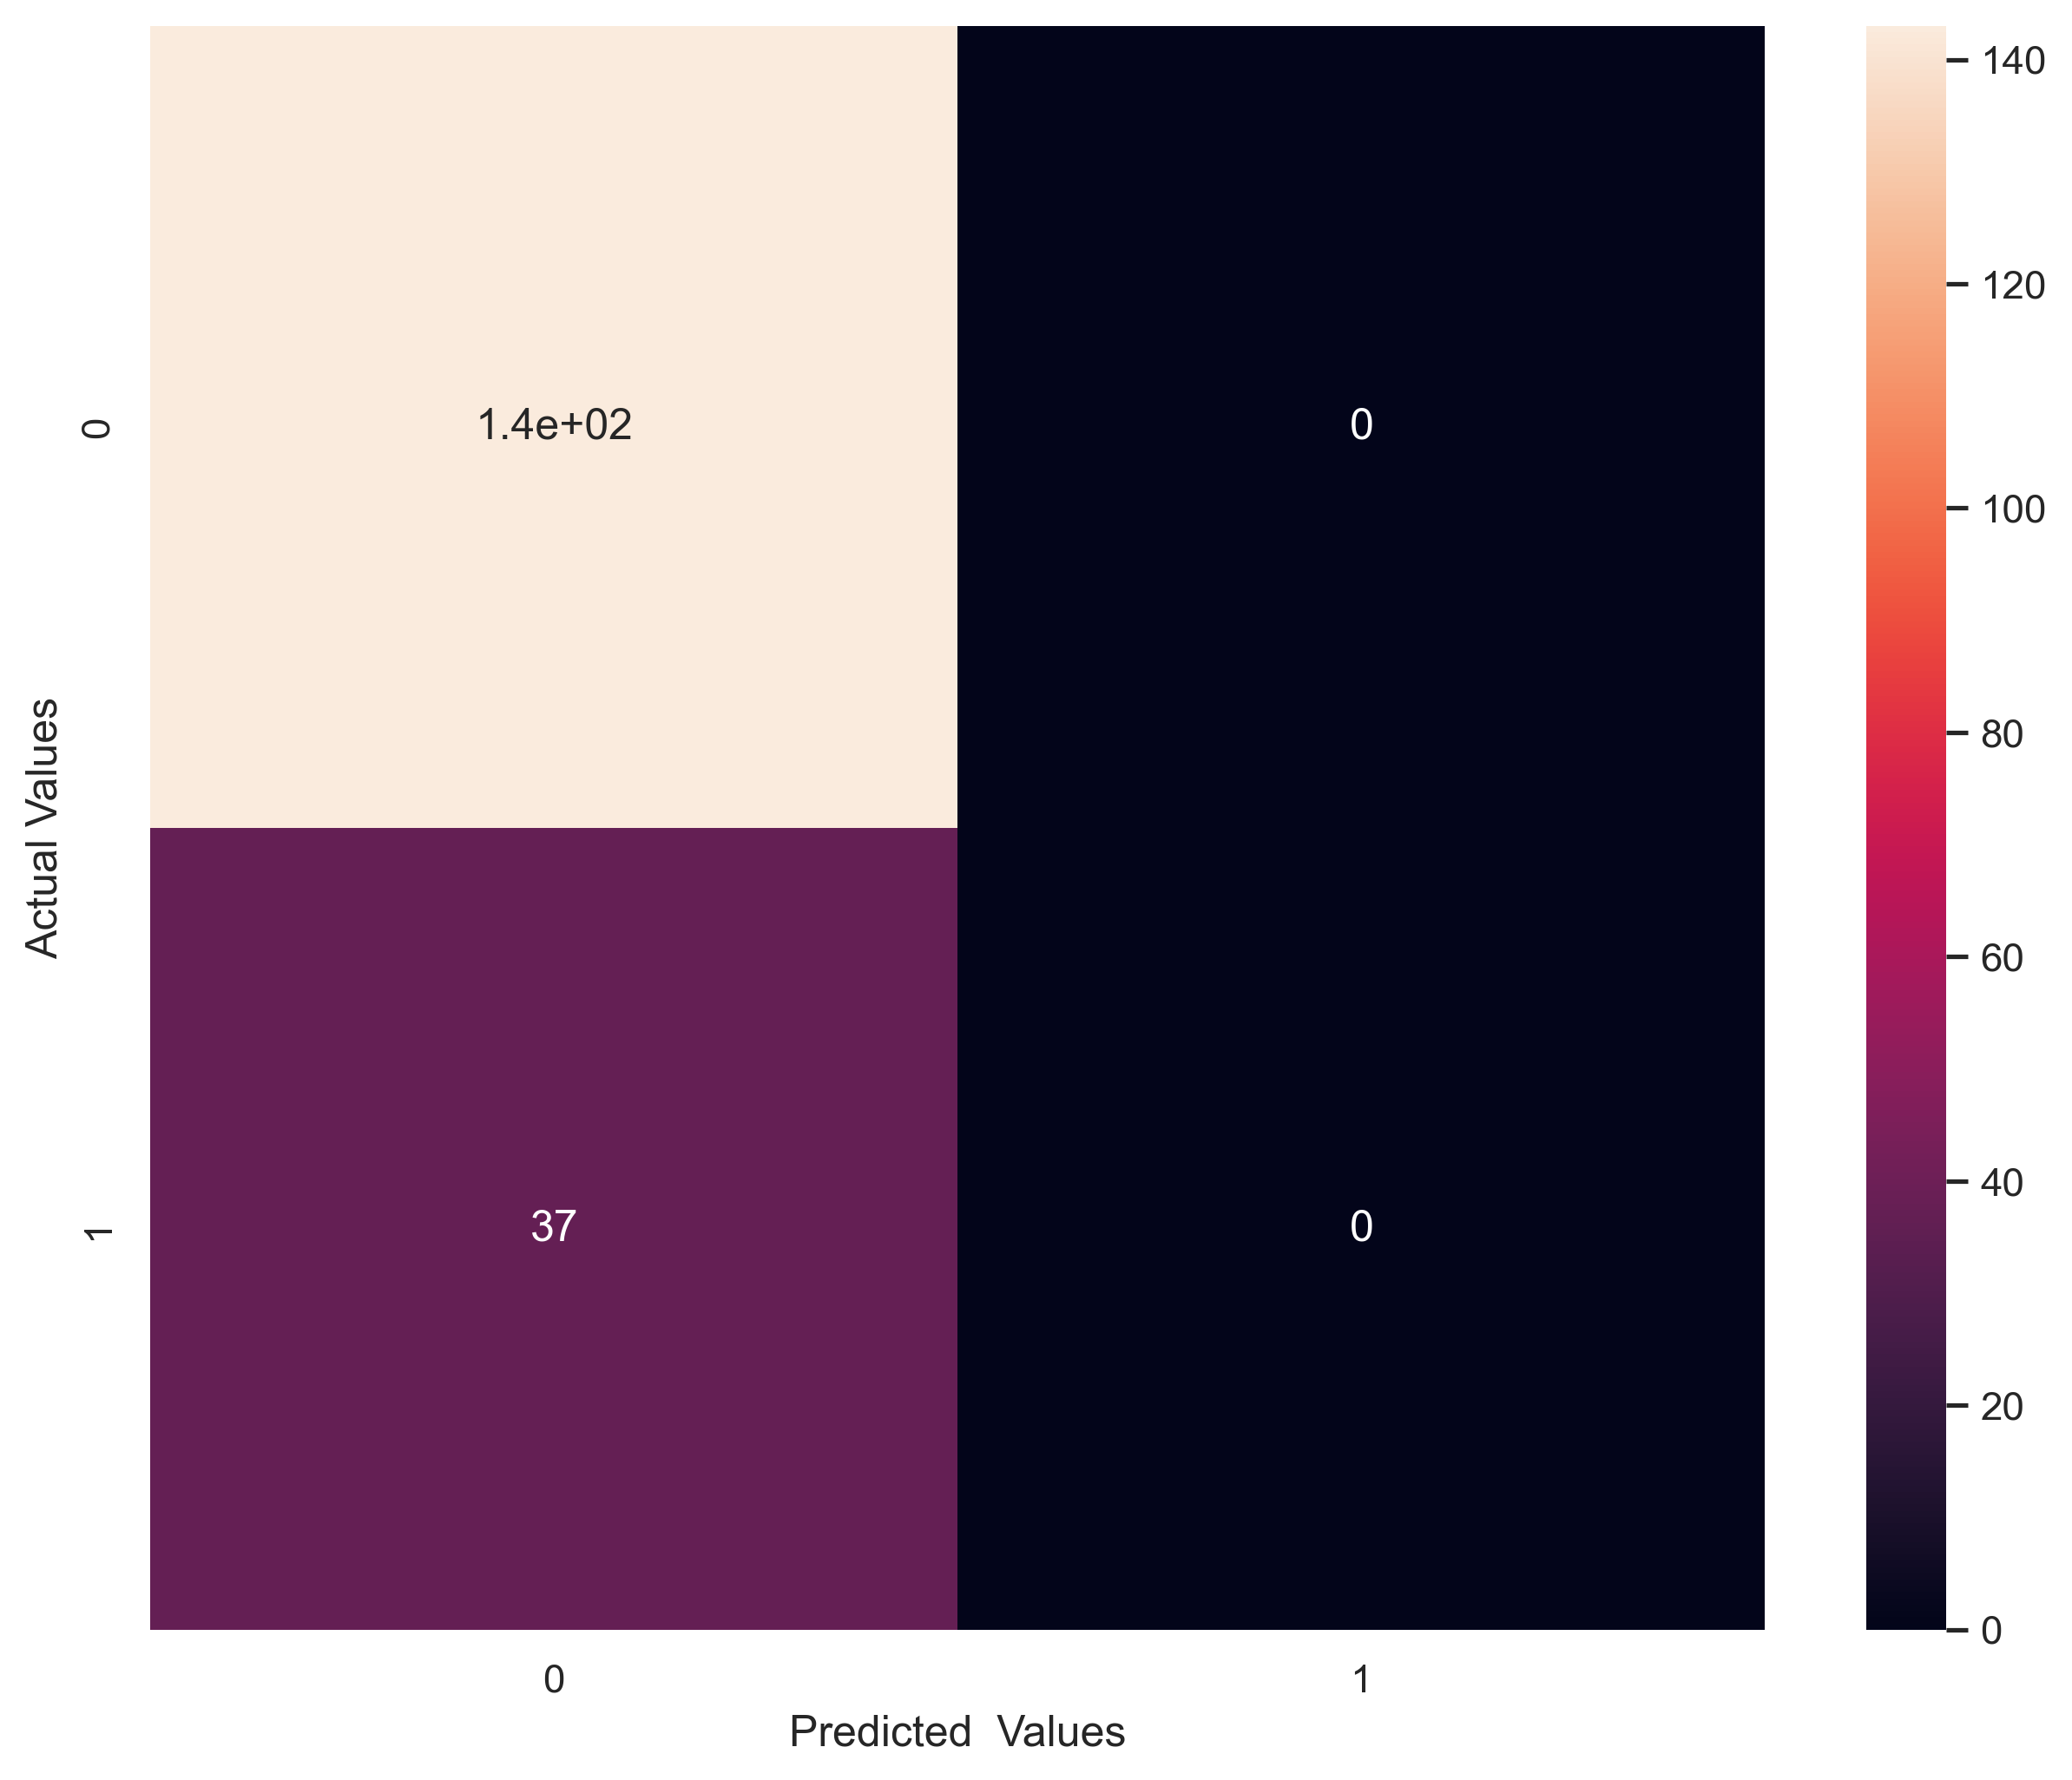

In [32]:
# Visualise the confusion matrix:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True)
plt.xlabel('Predicted  Values')
plt.ylabel('Actual Values')

### <font color = "green">➡ Visualising Tree:

In [33]:
# Visualizing first five trees in Random Forest:
fig,index = plt.subplots(1,5, dpi = 1000)

for i in range(0,5):
    tree.plot_tree(rfc.estimators_[i],
                   feature_names = x.columns,
                   class_names = df['Tax_Status'].unique(),
                   max_depth=2,
                   filled=True,
                   ax = index[i])

* ### <font color = 'blue'> <u> CONCLUSION </u>
> * #### Training and Testing Accuracy are almost same i.e. 79%. Which was same with Decision tree individual model. 
> * #### We can say model performing well on Testing data but fails to predict the "Risky" data points, i.e. 1.  This is due to biased dataset.

<br>
<br>
<br>

> # <font color = 'magenta'><u>END</u>
___